In [1]:
import pandas as pd
import numpy as np
import sympy
from sympy.solvers.inequalities import reduce_rational_inequalities,reduce_inequalities
from itertools import chain
from collections import defaultdict
from IPython.display import display

from sympy.parsing.sympy_parser import parse_expr
from sympy.parsing.sympy_parser import standard_transformations
from sympy.printing.mathml import print_mathml
import math
from IPython.display import display, Markdown, Latex
import os

import seaborn as sns
import matplotlib.pyplot as plt

def make_symbols_positive(sym):
    return sympy.symbols("{}".format(sym),positive =True)

def make_symbols_function(sym):
    return sympy.symbols("{}".format(sym),cl)

def subs_function(target,list_):
    return sympy.simplify(target.subs(list_))

def root_cal(value):
    return value**(1/2)

In [2]:
class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

print(color.BOLD + 'Hello World !' + color.END)

Hello World !


# w_range

In [3]:
def sol_w_same(df_1,target_):
    w_sol = sympy.solve([df_1["QD"][target_]-df_1["FB"][target_]],w)
    return w_sol

In [4]:
def sol_w_other(df_1,equa):
    w_sol = sympy.solve(equa,w)
    return w_sol

In [5]:
def display_solve(df_1,w_sol):
    for row,col in df_1.iterrows():
        print(row)
        try:
            display(col["QD"].subs([(w,w_sol)]).factor())
        except:
            print()
        print()

In [6]:
def display_solve2(df_1,w_sol):
    for row,col in df_1.iterrows():
        print(row)
        try:
            display(col["QD"].subs([(w,w_sol)]).simplify())
        except:
            print()
        print()

In [7]:
def display_w_insert(df_,w_1):
    order_ = ["w","epsilon","t","p","q_nd","q_t","q","profit_r","profit_s","profit_all","h1_r_p","h1_s_w","h1_s_e"]
    if w_1 == "WH":
        for ord_ in order_:
            try:
                value_ = df_[1][ord_].factor()
                value_2 = df_[1][ord_].simplify()
                print(color.RED + ord_ + color.END)
                display("factor: ",value_)
                display("simplify: ",value_2)
                print("-"*40)
            except:
                print(color.RED + ord_ + color.END)
                print("-"*40)
    else:
        for ord_ in order_:
            try:
                value_ = df_[1][ord_].subs([(w,w_1)]).factor()
                value_2 = df_[1][ord_].subs([(w,w_1)]).simplify()
                print(color.RED + ord_ + color.END)
                display("factor: ",value_)
                display("simplify: ",value_2)
                print("-"*40)
            except:
                print(color.RED + ord_ + color.END)
                print("-"*40)

In [8]:
Path_ = r"C:\Users\Samsung\jupyter\Graduation_thesis\result\version_total_3"

In [9]:
file_list = os.listdir(Path_)
file_list_xlsx = [f for f in file_list if f.endswith(".xlsx")]
#file_FB = [f for f in file_list_xlsx if f.contains("FB")]
#file_WH = [f for f in file_list_xlsx if f.contains("WH")]
#file_QD = [f for f in file_list_xlsx if f.contains("QD")]

In [10]:
file_name = [li.replace(".xlsx","") for li in file_list_xlsx]
file_name

['KN_BD_FB',
 'KN_BD_QD',
 'KN_BD_WH',
 'KN_BS_FB',
 'KN_BS_QD',
 'KN_BS_WH',
 'KN_DD_FB',
 'KN_DD_QD',
 'KN_DD_WH',
 'KN_SD_FB',
 'KN_SD_QD',
 'KN_SD_WH',
 'ND_FB',
 'ND_QD',
 'ND_WH',
 'UN_BD_QD',
 'UN_BD_WH',
 'UN_BS_QD',
 'UN_BS_WH',
 'UN_DD_QD',
 'UN_DD_WH',
 'UN_SD_QD',
 'UN_SD_WH']

In [11]:
for fn in file_name:
    path_ = Path_ + "\\{}.xlsx"
    globals() ["{}".format(fn)] = pd.read_excel(path_.format(fn),index_col=0,header=None)
    try:
        globals() ["{}".format(fn)] = globals() ["{}".format(fn)]#.rename(index={"profit_all":"pro_all"})
    except:
        pass

In [12]:
p,w,c,s,alpha,beta,delta_d,delta_s,epsilon,psi = make_symbols_positive("p,w,c,s,alpha,beta,delta_d,delta_s,epsilon,psi")

In [13]:
parse_dic = {"p":p,"w":w,"c":c,"s":s
             ,"alpha":alpha,"beta":beta
             ,"delta_d":delta_d,"delta_s":delta_s,"epsilon":epsilon }

In [14]:
for fn in file_name:
    globals() ["{}".format(fn)][1] = globals() ["{}".format(fn)][1].map(lambda x: parse_expr(x.replace("^","**").replace("lambda","lambda_"),parse_dic))

In [15]:
solve_w = sympy.solve((ND_QD[1]["profit_all"]-ND_FB[1]["profit_all"]).factor(),w)
w_c = solve_w[0]
w_c

alpha/beta

In [16]:
solve_ws = sympy.solve((ND_QD[1]["profit_s"]-ND_WH[1]["profit_s"]).factor(),w)
w_w = solve_ws[1]
w_w

(-alpha + 2*beta*c + sqrt(2)*(alpha - beta*c))/beta

# DD

In [17]:
tar_si = UN_DD_WH

qt_ = tar_si[1]["q_t"].factor()#.subs([(w,w_c)]).factor()
qd_ = tar_si[1]["q_d"].factor()#.subs([(w,w_c)]).factor()
#value_s = (-1*s_*(qt_-qd_)).factor()

equ_ = qt_-qd_

value_s = (equ_).factor()
dd_wh = sympy.solve(value_s,s)[0].factor()
dd_wh

(-2*alpha*delta_d + alpha + beta*c)/(2*beta*(delta_d - 1))

In [18]:
tar_si = UN_DD_QD

qt_ = tar_si[1]["q_t"].factor().subs([(w,w_w)]).factor()
qd_ = tar_si[1]["q_d"].factor().subs([(w,w_w)]).factor()
#value_s = (-1*s_*(qt_-qd_)).factor()

equ_ = qt_-qd_

value_s = (equ_).factor()
dd_qdw = sympy.solve(value_s,s)[0].factor()
dd_qdw

(-2*alpha*delta_d - sqrt(2)*alpha + 2*alpha + sqrt(2)*beta*c)/(2*beta*(delta_d - 1))

In [19]:
tar_si = UN_DD_QD

qt_ = tar_si[1]["q_t"].factor().subs([(w,w_c)]).factor()
qd_ = tar_si[1]["q_d"].factor().subs([(w,w_c)]).factor()
#value_s = (-1*s_*(qt_-qd_)).factor()

equ_ = qt_-qd_

value_s = (equ_).factor()
dd_qdc = sympy.solve(value_s,s)[0].factor()
dd_qdc

(-alpha*delta_d + beta*c)/(beta*(delta_d - 1))

# SD

In [20]:
tar_si = UN_SD_WH

qt_ = tar_si[1]["q_t"].factor()#.subs([(w,w_c)]).factor()
qd_ = tar_si[1]["q_d"].factor()#.subs([(w,w_c)]).factor()
#value_s = (-1*s_*(qt_-qd_)).factor()

equ_ = qd_-qt_

value_s = (equ_).factor()
sd_wh = sympy.solve(value_s,s)[0].factor()
sd_wh

-(-alpha*delta_s - alpha + beta*c*delta_s - beta*c)/(2*beta)

In [21]:
tar_si = UN_SD_QD

qt_ = tar_si[1]["q_t"].factor().subs([(w,w_w)]).factor()
qd_ = tar_si[1]["q_d"].factor().subs([(w,w_w)]).factor()
#value_s = (-1*s_*(qt_-qd_)).factor()

equ_ = qd_-qt_

value_s = (equ_).factor()
sd_qdw = sympy.solve(value_s,s)[0].factor()
sd_qdw

-(-sqrt(2)*alpha*delta_s - 2*alpha + sqrt(2)*alpha + sqrt(2)*beta*c*delta_s - sqrt(2)*beta*c)/(2*beta)

In [22]:
tar_si = UN_SD_QD

qt_ = tar_si[1]["q_t"].factor().subs([(w,w_c)]).factor()
qd_ = tar_si[1]["q_d"].factor().subs([(w,w_c)]).factor()
#value_s = (-1*s_*(qt_-qd_)).factor()

equ_ = qd_-qt_

value_s = (equ_).factor()
sd_qdc = sympy.solve(value_s,s)[0].factor()
sd_qdc

-(-alpha*delta_s + beta*c*delta_s - beta*c)/beta

# BD

In [23]:
tar_si = UN_BD_WH

qt_ = tar_si[1]["q_t"].factor()#.subs([(w,w_c)]).factor()
qd_ = tar_si[1]["q_d"].factor()#.subs([(w,w_c)]).factor()
#value_s = (-1*s_*(qt_-qd_)).factor()

equ_ = qt_-qd_

value_s = (equ_).factor()
bd_wh = sympy.solve(value_s,s)[0].factor()
bd_wh

-(2*alpha*delta_d - alpha*delta_s - alpha + beta*c*delta_s - beta*c)/(2*beta*(delta_d - 1))

In [24]:
tar_si = UN_BD_QD

qt_ = tar_si[1]["q_t"].factor().subs([(w,w_w)]).factor()
qd_ = tar_si[1]["q_d"].factor().subs([(w,w_w)]).factor()
#value_s = (-1*s_*(qt_-qd_)).factor()

equ_ = qt_-qd_

value_s = (equ_).factor()
bd_qdw = sympy.solve(value_s,s)[0].factor()
bd_qdw

-(2*alpha*delta_d - sqrt(2)*alpha*delta_s - 2*alpha + sqrt(2)*alpha + sqrt(2)*beta*c*delta_s - sqrt(2)*beta*c)/(2*beta*(delta_d - 1))

In [25]:
tar_si = UN_BD_QD

qt_ = tar_si[1]["q_t"].factor().subs([(w,w_c)]).factor()
qd_ = tar_si[1]["q_d"].factor().subs([(w,w_c)]).factor()
#value_s = (-1*s_*(qt_-qd_)).factor()

equ_ = qt_-qd_

value_s = (equ_).factor()
bd_qdc = sympy.solve(value_s,s)[0].factor()
bd_qdc

-(alpha*delta_d - alpha*delta_s + beta*c*delta_s - beta*c)/(beta*(delta_d - 1))

# BS

In [26]:
tar_si = UN_BS_WH

qt_ = tar_si[1]["q_t"].factor()#.subs([(w,w_c)]).factor()
qd_ = tar_si[1]["q_d"].factor()#.subs([(w,w_c)]).factor()
#value_s = (-1*s_*(qt_-qd_)).factor()

equ_ = qd_-qt_

value_s = (equ_).factor()
bs_wh = sympy.solve(value_s,s)[0].factor()
bs_wh

(2*alpha*delta_d - alpha*delta_s - alpha + beta*c*delta_s - beta*c)/(2*beta*(delta_d - 1))

In [27]:
tar_si = UN_BS_QD

qt_ = tar_si[1]["q_t"].factor().subs([(w,w_w)]).factor()
qd_ = tar_si[1]["q_d"].factor().subs([(w,w_w)]).factor()
#value_s = (-1*s_*(qt_-qd_)).factor()

equ_ = qd_-qt_

value_s = (equ_).factor()
bs_qdw = sympy.solve(value_s,s)[0].factor()
bs_qdw

(2*alpha*delta_d - sqrt(2)*alpha*delta_s - 2*alpha + sqrt(2)*alpha + sqrt(2)*beta*c*delta_s - sqrt(2)*beta*c)/(2*beta*(delta_d - 1))

In [28]:
tar_si = UN_BS_QD

qt_ = tar_si[1]["q_t"].factor().subs([(w,w_c)]).factor()
qd_ = tar_si[1]["q_d"].factor().subs([(w,w_c)]).factor()
#value_s = (-1*s_*(qt_-qd_)).factor()

equ_ = qd_-qt_

value_s = (equ_).factor()
bs_qdc = sympy.solve(value_s,s)[0].factor()
bs_qdc

(alpha*delta_d - alpha*delta_s + beta*c*delta_s - beta*c)/(beta*(delta_d - 1))

In [29]:
data_ = {"DD":[dd_wh,dd_qdw,dd_qdc],"SD":[sd_wh,sd_qdw,sd_qdc],"BD":[bd_wh,bd_qdw,bd_qdc],"BS":[bs_wh,bd_qdw,bd_qdc]}
con_df = pd.DataFrame(data_).rename(index={0:"WH",1:"QDW",2:"QDC"})
con_df

,DD,SD,BD,BS
WH,(-2*alpha*delta_d + alpha + beta*c)/(2*beta*(d...,-(-alpha*delta_s - alpha + beta*c*delta_s - be...,-(2*alpha*delta_d - alpha*delta_s - alpha + be...,(2*alpha*delta_d - alpha*delta_s - alpha + bet...
QDW,(-2*alpha*delta_d - sqrt(2)*alpha + 2*alpha + ...,-(-sqrt(2)*alpha*delta_s - 2*alpha + sqrt(2)*a...,-(2*alpha*delta_d - sqrt(2)*alpha*delta_s - 2*...,-(2*alpha*delta_d - sqrt(2)*alpha*delta_s - 2*...
QDC,(-alpha*delta_d + beta*c)/(beta*(delta_d - 1)),-(-alpha*delta_s + beta*c*delta_s - beta*c)/beta,-(alpha*delta_d - alpha*delta_s + beta*c*delta...,-(alpha*delta_d - alpha*delta_s + beta*c*delta...


# load setting

In [30]:
time_ = "UN"
diss_ = ["DD","SD","BD","BS"]

for dis_ in diss_:
    tar_wh = globals() ["{}_{}_WH".format(time_,dis_)]
    tar_qd = globals() ["{}_{}_QD".format(time_,dis_)]
    globals() ["{}_{}_QD{}".format(time_,dis_,"W")] = pd.DataFrame(tar_qd[1].map(lambda x : x.subs([(w,w_w)]).factor()))  
    globals() ["{}_{}_QD{}".format(time_,dis_,"C")] = pd.DataFrame(tar_qd[1].map(lambda x : x.subs([(w,w_c)]).factor()))  

In [31]:
def s_para_display(n_d,n_s):

    para_ = [(alpha,1200),(beta,7),(c,50),(delta_d,n_d),(delta_s,n_s)]

    s_up_d = s_up.subs(para_).factor().simplify()
    s_down_d = s_down.subs(para_).factor().simplify()
    display(s_down,float(s_down_d))
    display(s_up,float(s_up_d))


In [32]:
def s_para(n_d,n_s):

    para_ = [(alpha,1200),(beta,7),(c,50),(delta_d,n_d),(delta_s,n_s)]

    s_up_d = s_up.subs(para_).factor().simplify()
    s_down_d = s_down.subs(para_).factor().simplify()
    return float(s_down_d),float(s_up_d)

In [33]:
eq_ = (UN_BS_QDW[1]["profit_r"]-UN_BS_QDC[1]["profit_r"]).factor()
s_up = sympy.solve(eq_,s)[0]
s_up

(alpha - 2*sqrt(2)*beta*c + 3*beta*c)/(2*beta*(2 - sqrt(2)))

In [34]:
eq_ = (UN_BS_WH[1]["profit_r"]-UN_BS_QDC[1]["profit_r"]).factor()
s_down = sympy.solve(eq_,s)[0]
s_down

(alpha + beta*c)/(2*beta)

In [35]:
def tar_para(time_,dis_,tar_,n_d,n_s,s_,c_):
    para_ = [(alpha,1200),(beta,7),(c,c_),(delta_d,n_d),(delta_s,n_s),(s,s_)]

    tar_wh = globals() ["{}_{}_WH".format(time_,dis_)]
    tar_qdc = globals() ["{}_{}_QDC".format(time_,dis_)]
    tar_qdw = globals() ["{}_{}_QDW".format(time_,dis_)]


    wh_df = pd.DataFrame(tar_wh[1].map(lambda x : x.subs(para_).simplify()))  
    qdw_df = pd.DataFrame(tar_qdw[1].map(lambda x : x.subs(para_).simplify()))  
    qdc_df = pd.DataFrame(tar_qdc[1].map(lambda x : x.subs(para_).simplify()))

    return float(wh_df[1][tar_]),float(qdw_df[1][tar_]),float(qdc_df[1][tar_])

In [36]:
def para_all():
    iter_1 = np.arange(0,c_,gap_)
    iter_2 = np.arange(c_,s_para(d_,s_)[0],gap_)
    iter_3 = np.arange(s_para(d_,s_)[0],s_para(d_,s_)[1],gap_)
    iter_4 = np.arange(s_para(d_,s_)[1],s_para(d_,s_)[1]+42,gap_)
    all_ = []
    for s_can in iter_1:
        wh_can,qdw_can,qdc_can = tar_para("UN",i_1,tar_,d_,s_,s_can,c_)
        all_can = [s_can,wh_can,qdw_can,qdc_can]
        all_.append(all_can)
    df_iter_12 = pd.DataFrame(all_).set_index(0).rename(columns={1:"WH",2:"QDW",3:"QDC"})

    all_ = []
    for s_can in iter_2:
        wh_can,qdw_can,qdc_can = tar_para("UN",i_1,tar_,d_,s_,s_can,c_)
        all_can = [s_can,wh_can,qdw_can,qdc_can]
        all_.append(all_can)
    df_iter_22 = pd.DataFrame(all_).set_index(0).rename(columns={1:"WH",2:"QDW",3:"QDC"})

    all_ = []
    for s_can in iter_3:
        wh_can,qdw_can,qdc_can = tar_para("UN",i_1,tar_,d_,s_,s_can,c_)
        all_can = [s_can,wh_can,qdw_can,qdc_can]
        all_.append(all_can)
    df_iter_32 = pd.DataFrame(all_).set_index(0).rename(columns={1:"WH",2:"QDW",3:"QDC"})

    all_ = []
    for s_can in iter_4:
        wh_can,qdw_can,qdc_can = tar_para("UN",i_1,tar_,d_,s_,s_can,c_)
        all_can = [s_can,wh_can,qdw_can,qdc_can]
        all_.append(all_can)
    df_iter_42 = pd.DataFrame(all_).set_index(0).rename(columns={1:"WH",2:"QDW",3:"QDC"})
    df_iter_all2 = pd.concat([df_iter_12,df_iter_22,df_iter_32,df_iter_42])
    return df_iter_all2

In [37]:
def para_all_2():
    #iter_1 = np.arange(-s_para(d_,s_)[1]-30,-s_para(d_,s_)[1],gap_)
    #iter_2 = np.arange(-s_para(d_,s_)[1],-s_para(d_,s_)[0],gap_)
    iter_1 = np.arange(-c_,0,gap_)
    iter_2 = np.arange(0,s_para(d_,s_)[0],gap_)
    all_ = []
    for s_can in iter_1:
        wh_can,qdw_can,qdc_can = tar_para("UN",i_1,tar_,d_,s_,s_can,c_)
        all_can = [s_can,wh_can,qdw_can,qdc_can]
        all_.append(all_can)
    df_iter_12 = pd.DataFrame(all_).set_index(0).rename(columns={1:"WH",2:"QDW",3:"QDC"})

    all_ = []
    for s_can in iter_2:
        wh_can,qdw_can,qdc_can = tar_para("UN",i_1,tar_,d_,s_,s_can,c_)
        all_can = [s_can,wh_can,qdw_can,qdc_can]
        all_.append(all_can)
    df_iter_22 = pd.DataFrame(all_).set_index(0).rename(columns={1:"WH",2:"QDW",3:"QDC"})

    df_iter_all2 = pd.concat([df_iter_12,df_iter_22])
    return df_iter_all2

In [130]:
def para_all_3():
    #iter_1 = np.arange(-s_para(d_,s_)[1]-30,-s_para(d_,s_)[1],gap_)
    #iter_2 = np.arange(-s_para(d_,s_)[1],-s_para(d_,s_)[0],gap_)
    iter_1 = np.arange(-c_-50,0,gap_)
    iter_2 = np.arange(0,s_para(d_,s_)[0],gap_)
    all_ = []
    for s_can in iter_1:
        wh_can,qdw_can,qdc_can = tar_para("UN",i_1,tar_,d_,s_,s_can,c_)
        all_can = [s_can,wh_can,qdw_can,qdc_can]
        all_.append(all_can)
    df_iter_12 = pd.DataFrame(all_).set_index(0).rename(columns={1:"WH",2:"QDW",3:"QDC"})

    all_ = []
    for s_can in iter_2:
        wh_can,qdw_can,qdc_can = tar_para("UN",i_1,tar_,d_,s_,s_can,c_)
        all_can = [s_can,wh_can,qdw_can,qdc_can]
        all_.append(all_can)
    df_iter_22 = pd.DataFrame(all_).set_index(0).rename(columns={1:"WH",2:"QDW",3:"QDC"})

    df_iter_all2 = pd.concat([df_iter_12,df_iter_22])
    return df_iter_all2

In [38]:
down_wh = 1/2
up_wh = (alpha+beta*c)/(2*alpha)

down_qdw =  1 - ((2)**(1/2)/2)
up_qdw = 1-(((alpha-beta*c)**(1/2))/(2*alpha)) 


up_qdc = (beta*c)/alpha



# Closed form 정리

In [39]:
con_df

,DD,SD,BD,BS
WH,(-2*alpha*delta_d + alpha + beta*c)/(2*beta*(d...,-(-alpha*delta_s - alpha + beta*c*delta_s - be...,-(2*alpha*delta_d - alpha*delta_s - alpha + be...,(2*alpha*delta_d - alpha*delta_s - alpha + bet...
QDW,(-2*alpha*delta_d - sqrt(2)*alpha + 2*alpha + ...,-(-sqrt(2)*alpha*delta_s - 2*alpha + sqrt(2)*a...,-(2*alpha*delta_d - sqrt(2)*alpha*delta_s - 2*...,-(2*alpha*delta_d - sqrt(2)*alpha*delta_s - 2*...
QDC,(-alpha*delta_d + beta*c)/(beta*(delta_d - 1)),-(-alpha*delta_s + beta*c*delta_s - beta*c)/beta,-(alpha*delta_d - alpha*delta_s + beta*c*delta...,-(alpha*delta_d - alpha*delta_s + beta*c*delta...


In [42]:
tar_ = "DD"
tar_e = "profit_r"
list_ = ["WH","QDW","QDC"]
turn_point = {}
for i in range(len(list_)):
    eq_2 = globals () ["UN_{}_{}".format(tar_,list_[i])][1][tar_e]
    s_2 = con_df[tar_][list_[i]]
    result_ =eq_2.subs([(s,s_2)]).factor()
    turn_point[list_[i]] = result_

In [43]:
(turn_point["WH"]-turn_point["QDW"]).factor()

-(-alpha + beta*c)**2*(-4*delta_d + 4*sqrt(2)*delta_d - 4*sqrt(2) + 5)/(16*beta*(delta_d - 1))

In [51]:
iter_ = np.arange(0.1,1,0.1)
for i in iter_:
    print(float((turn_point["WH"]-turn_point["QDW"]).factor().subs([(delta_d,i),(alpha,1200),(beta,7),(c,50)])))

-3520.5305132184567
-2624.573171948612
-1472.628018887384
63.29885186091474
2213.596470908533
5439.042899479953
10814.786947099014
21566.275042337107
53820.739328051386


In [64]:
eq_ = (turn_point["WH"]-turn_point["QDW"]).factor()
float(sympy.solve(eq_,delta_d)[0].factor())

0.3964466094067262

In [119]:
i_1 = "DD"
tar_ = "profit_r"
d_ = 0.7
s_ = 0.3
c_ = 200
gap_ = 5
para_set =  [(alpha,1200),(beta,7),(c,c_),(delta_d,d_),(delta_s,s_),(s,s_)]
para_set

[(alpha, 1200), (beta, 7), (c, 200), (delta_d, 0.7), (delta_s, 0.3), (s, 0.3)]

In [120]:
test_r = para_all_2()

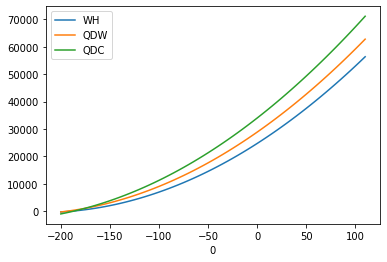

In [121]:
test_r.plot()

In [122]:
con_df["DD"]["WH"].subs(para_set)

-219.047619047619

In [123]:
float(sympy.solve((con_df["DD"]["WH"]-c).factor(),delta_d)[0].subs(para_set))

1.0384615384615385

In [124]:
sympy.solve((con_df["DD"]["WH"]-c).factor(),delta_d)[0]

(alpha + 3*beta*c)/(2*(alpha + beta*c))

In [126]:
(con_df["DD"]["WH"]+c).factor()

(-alpha + beta*c)*(2*delta_d - 1)/(2*beta*(delta_d - 1))

In [98]:
turn_point["WH"].subs(para_set)

-80257.1428571429

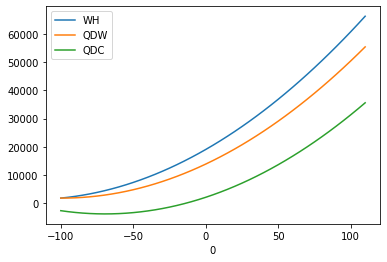

In [70]:
test_r.plot()

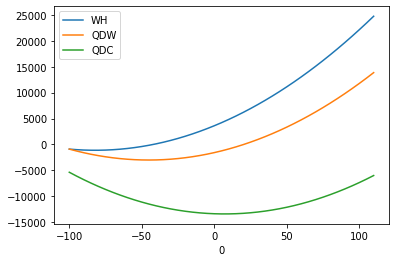

In [73]:
test_r.plot()

In [88]:
turn_point["WH"]

(-alpha + beta*c)**2*(2*delta_d - 1)/(16*beta*(delta_d - 1))

In [182]:
sympy.solve((turn_point["WH"]-turn_point["QDW"]).factor(),delta_d)[0]

3/4 - sqrt(2)/4

In [181]:
float(sympy.solve((turn_point["WH"]-turn_point["QDW"]).factor(),delta_d)[0])

0.3964466094067262

In [91]:
con_df["DD"]["WH"]

(-2*alpha*delta_d + alpha + beta*c)/(2*beta*(delta_d - 1))

In [94]:
sympy.solve((con_df["DD"]["WH"]-c).factor(),delta_d)[0]

(alpha + 3*beta*c)/(2*(alpha + beta*c))

In [101]:
(s_up-con_df["DD"]["WH"]).factor()

(-5*alpha*delta_d + 2*sqrt(2)*alpha*delta_d - sqrt(2)*alpha + 3*alpha - 3*beta*c*delta_d + 2*sqrt(2)*beta*c*delta_d - 3*sqrt(2)*beta*c + 5*beta*c)/(2*beta*(-2 + sqrt(2))*(delta_d - 1))

# 여기서 부터다시

In [131]:
i_1 = "DD"
tar_ = "profit_r"
d_ = 0.7
s_ = 0.3
c_ = 200
gap_ = 5
para_set =  [(alpha,1200),(beta,7),(c,c_),(delta_d,d_),(delta_s,s_),(s,s_)]
para_set

[(alpha, 1200), (beta, 7), (c, 200), (delta_d, 0.7), (delta_s, 0.3), (s, 0.3)]

In [137]:
float(sympy.solve((turn_point["WH"]-turn_point["QDW"]).factor(),delta_d)[0])

0.3964466094067262

In [132]:
test_r = para_all_3()

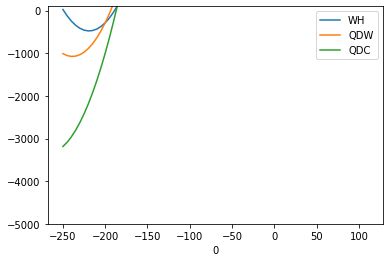

In [134]:
test_r.plot(ylim=(-5000,100))

In [167]:
i_1 = "DD"
tar_ = "profit_r"
d_ = 0.5
s_ = 0.3
c_ = 200
gap_ = 5
para_set =  [(alpha,1200),(beta,7),(c,c_),(delta_d,d_),(delta_s,s_),(s,s_)]
para_set

[(alpha, 1200), (beta, 7), (c, 200), (delta_d, 0.5), (delta_s, 0.3), (s, 0.3)]

In [168]:
float(sympy.solve((turn_point["WH"]-turn_point["QDW"]).factor(),delta_d)[0])

0.3964466094067262

In [169]:
test_r = para_all_3()

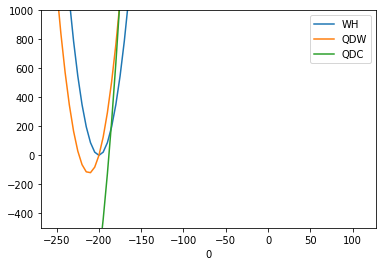

In [170]:
test_r.plot(ylim=(-500,1000))

## vertext of QDW 가 -c 보다 클 경우

In [171]:
(con_df["DD"]["QDW"]+c).factor()

(-alpha + beta*c)*(2*delta_d - 2 + sqrt(2))/(2*beta*(delta_d - 1))

In [176]:
sympy.solve((con_df["DD"]["QDW"]+c).factor(),delta_d)[0].factor()

-(-2 + sqrt(2))/2

In [149]:
float(sympy.solve((con_df["DD"]["QDW"]+c).factor(),delta_d)[0])

0.2928932188134525

### --> delta_d < 0.29일때

In [150]:
i_1 = "DD"
tar_ = "profit_r"
d_ = 0.2
s_ = 0.3
c_ = 200
gap_ = 5
para_set =  [(alpha,1200),(beta,7),(c,c_),(delta_d,d_),(delta_s,s_),(s,s_)]
para_set

[(alpha, 1200), (beta, 7), (c, 200), (delta_d, 0.2), (delta_s, 0.3), (s, 0.3)]

In [151]:
float(sympy.solve((turn_point["WH"]-turn_point["QDW"]).factor(),delta_d)[0])

0.3964466094067262

In [152]:
test_r = para_all_3()

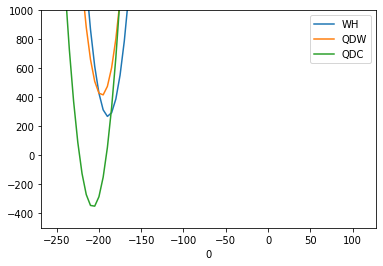

In [153]:
test_r.plot(ylim=(-500,1000))

In [157]:
float(turn_point["QDW"].subs(para_set))

413.1622319615643

In [159]:
float(con_df["DD"]["QDW"].subs(para_set))

-196.68238504237667

# DD 에서 profit_r이 QDW가 좋은 경우는 있다.

In [160]:
tar_ = "p"
test_r = para_all_2()

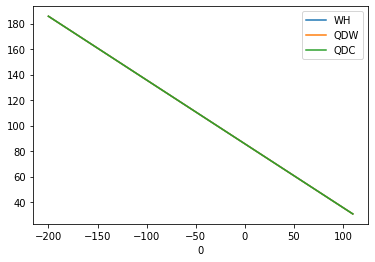

In [161]:
test_r.plot()

In [162]:
tar_ = "q_t"
test_r = para_all_2()

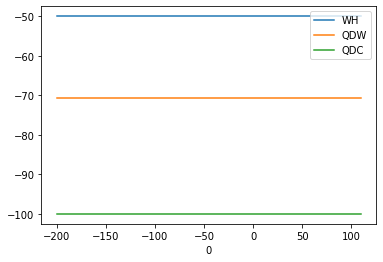

In [163]:
test_r.plot()

In [165]:
tar_ = "q_d"
test_r = para_all_2()

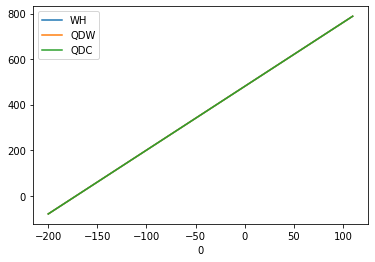

In [166]:
test_r.plot()

## vertext_QDW 의 y value가 ver_WH의 y보다 클 조건과, 앞의 조건 사이 = 0.35

In [187]:
i_1 = "DD"
tar_ = "profit_r"
d_ = 0.35
s_ = 0.35
c_ = 200
gap_ = 5
para_set =  [(alpha,1200),(beta,7),(c,c_),(delta_d,d_),(delta_s,s_),(s,s_)]
para_set

[(alpha, 1200),
 (beta, 7),
 (c, 200),
 (delta_d, 0.35),
 (delta_s, 0.35),
 (s, 0.35)]

In [188]:
float(sympy.solve((turn_point["WH"]-turn_point["QDW"]).factor(),delta_d)[0])

0.3964466094067262

In [189]:
test_r = para_all_3()

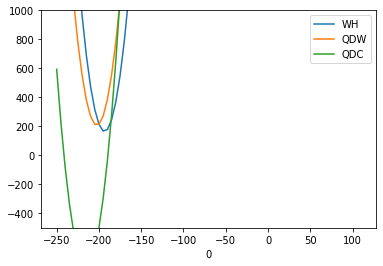

In [190]:
test_r.plot(ylim=(-500,1000))

### 여전히 QDW가 WH 보다 크다

## vertext_QDW 의 y value가 ver_WH의 y보다 클 조건 0.4

In [201]:
i_1 = "DD"
tar_ = "profit_r"
d_ = 0.6
s_ = 0.1
c_ = 200
gap_ = 5
para_set =  [(alpha,1200),(beta,7),(c,c_),(delta_d,d_),(delta_s,s_),(s,s_)]
para_set

[(alpha, 1200), (beta, 7), (c, 200), (delta_d, 0.6), (delta_s, 0.1), (s, 0.1)]

In [202]:
float(sympy.solve((turn_point["WH"]-turn_point["QDW"]).factor(),delta_d)[0])

0.3964466094067262

In [203]:
test_r = para_all_3()

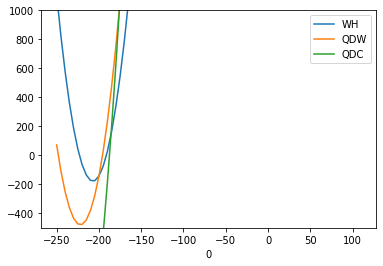

In [204]:
test_r.plot(ylim=(-500,1000))

In [205]:
float(turn_point["QDW"].subs(para_set))

-479.69491089557835

In [206]:
float(con_df["DD"]["QDW"].subs(para_set))

-221.93619865618194

In [207]:
float(con_df["DD"]["WH"].subs(para_set))

-207.1428571428571

In [211]:
d_a = sympy.solve((con_df["DD"]["QDW"]+c).factor(),delta_d)[0].factor()

In [215]:
d_a

-(-2 + sqrt(2))/2

In [221]:
float((turn_point["WH"]-turn_point["QDW"]).factor().subs([(delta_d,d_a+0.001)]).factor().subs(para_set))

-86.65738825688756

In [224]:
d_b = sympy.solve((turn_point["WH"]-turn_point["QDW"]).factor(),delta_d)[0]
d_b

3/4 - sqrt(2)/4

In [223]:
float(sympy.solve((turn_point["WH"]-turn_point["QDW"]).factor(),delta_d)[0])

0.3964466094067262

In [230]:
float((turn_point["WH"]-turn_point["QDW"]).factor().subs([(delta_d,d_b+0.000001)]).factor().subs(para_set))

0.000980418054459783

# profit_ all 한번

In [232]:
i_1 = "DD"
tar_ = "profit_all"
d_ = 0.2
s_ = 0.1
c_ = 200
gap_ = 5
para_set =  [(alpha,1200),(beta,7),(c,c_),(delta_d,d_),(delta_s,s_),(s,s_)]
para_set

[(alpha, 1200), (beta, 7), (c, 200), (delta_d, 0.2), (delta_s, 0.1), (s, 0.1)]

In [235]:
test_r = para_all_2()

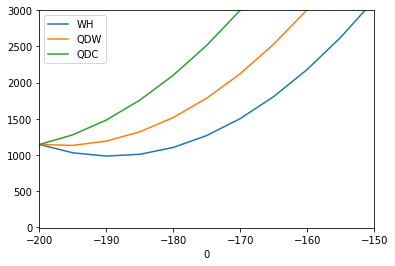

In [242]:
test_r.plot(xlim=(-200,-150),ylim=(-10,3000))

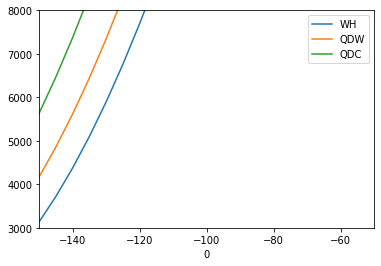

In [243]:
test_r.plot(xlim=(-150,-50),ylim=(3000,8000))

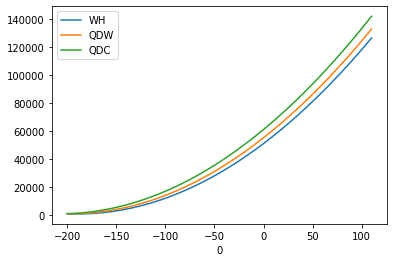

In [244]:
test_r.plot()